In [12]:
import keras

# asta e arhitectura standard: bagi porcu si il transformi secvential pana iese cirnatzu
from keras.models import Sequential
# asta e cel mai simplu tip de layer: fully connected
from keras.layers import Dense
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# face datasetu asta cu doua semilune
from sklearn.datasets import make_moons

# scalezi inputul ca sa contina numere mici
# ajuta si la forma functiei de eroare 
#    - reduci sansa sa fie canale/rigole adinci si abrupte, greu de gasit
#    - si la redus erorile aritmetice din finite precision computation
from sklearn.preprocessing import scale

# imparte in training si testing
from sklearn.model_selection import train_test_split

In [4]:
X, Y = make_moons(noise=0.2, random_state=0, n_samples=1000)
X = scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5)

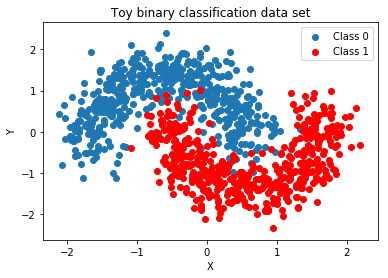

In [7]:
fig, ax = plt.subplots()
ax.scatter(X[Y==0, 0], X[Y==0, 1], label='Class 0')
ax.scatter(X[Y==1, 0], X[Y==1, 1], color='r', label='Class 1')
ax.legend()
ax.set(xlabel='X', ylabel='Y', title='Toy binary classification data set');

# Modelul in Keras

Ce dorim: sa clasificam orice punct de coordonate (x, y) ca fiind de clasa 1 sau 2.

In [8]:
model = Sequential()
# primul layer are nevoie de `input_dim`, adica cate feature-uri ai
# in cazul asta sint doua: coordonatele x si y
# numarul de neuroni, 16, e la liber
model.add(Dense(16, input_dim=2, activation='sigmoid')) 
# numarul de neuroni, again, e la liber - have fun
model.add(Dense(10, activation='sigmoid')) 
# numarul de neroni e fix 1, pentru ca e un output: 1 pentru clasa 1 si 0 pentru clasa 0
# de aia si si pui activation sigmoidal
model.add(Dense(1, activation='sigmoid')) #binary classification so one output

model.compile(optimizer='AdaDelta',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/home/sgrosu/anaconda3/lib/python3.6/site-packages/nose_parameterized/__init__.py:7: UserWarning: The 'nose-parameterized' package has been renamed 'parameterized'. For the two step migration instructions, see: https://github.com/wolever/parameterized#migrating-from-nose-parameterized-to-parameterized (set NOSE_PARAMETERIZED_NO_WARN=1 to suppress this warning)
  "The 'nose-parameterized' package has been renamed 'parameterized'. "
Can not use cuDNN on context None: cannot compile with cuDNN. We got this error:
b'In file included from /tmp/try_flags_1tgmgu4k.c:4:0:\n/usr/include/cudnn.h:63:26: fatal error: driver_types.h: No such file or directory\ncompilation terminated.\n'
Mapped name None to device cuda: GeForce GTX 1060 3GB (0000:01:00.0)


Btw, pentru tine asa, sa vezi cum arata sigmoidul, desi sint convins sa stiai:

In [9]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [10]:
plt.style.use('ggplot')

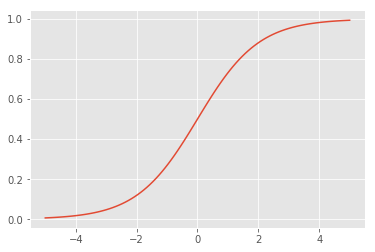

In [13]:
x = np.linspace(-5, 5, num=100)
plt.plot(x, sigmoid(x));

In [7]:
# !sed -i 's/theano/tensorflow/g' $HOME/.keras/keras.json

In [68]:
# asta e pentru tensorboard - vizualizare de curbe de invatare; mai tirziu
# tb_callback = keras.callbacks.TensorBoard(log_dir='./Graph/model_1/',
#                                           histogram_freq=0, write_graph=True,
#                                           write_images=False)

In [14]:
# asa arata modelul
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                48        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 229
Trainable params: 229
Non-trainable params: 0
_________________________________________________________________


In [15]:
# fit the 
model.fit(X_train, Y_train, batch_size=32, epochs=100, verbose=0)
score = model.evaluate(X_test, Y_test, verbose=0)
# eroarea finala - valoarea finala nu e interpretabila, dar comparabila
# intre modele diferite, sau run-uri diferite
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.321320719719
Test accuracy: 0.86


Ce probabilitati de apartenta la clasa 1 da modelul asta:

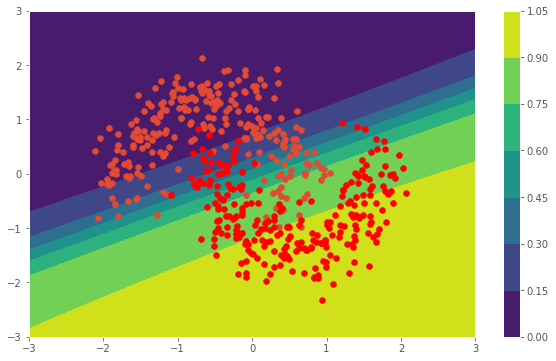

In [16]:
import numpy as np
grid = np.mgrid[-3:3:100j,-3:3:100j]
grid_2d = grid.reshape(2, -1).T
X, Y = grid
prediction_probs = model.predict_proba(grid_2d, batch_size=32, verbose=0)

##plot results
fig, ax = plt.subplots(figsize=(10, 6))
contour = ax.contourf(X, Y, prediction_probs.reshape(100, 100))
ax.scatter(X_test[Y_test==0, 0], X_test[Y_test==0, 1])
ax.scatter(X_test[Y_test==1, 0], X_test[Y_test==1, 1], color='r')
cbar = plt.colorbar(contour, ax=ax)

Acelasi lucru folosing scikit-learn; pentru chestiute micute ca asta merge chiar mai usor; dar vgg-uri si chestiile misto de mai incolo, nope, de aia avem nevoie de tensorflow/keras.

In [17]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=[32, 1], activation='relu', 
                    batch_size=32, alpha=0.01,
                    max_iter=500, solver='adam')
clf.fit(X_train, Y_train)
print(clf.score(X_test, Y_test))

0.962


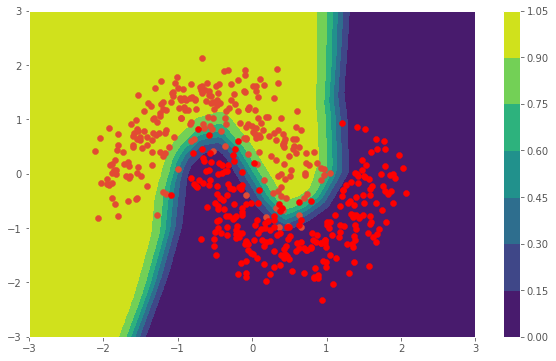

In [18]:
mlp_probs = clf.predict_proba(grid_2d)
fig, ax = plt.subplots(figsize=(10, 6))
contour = ax.contourf(X, Y, mlp_probs[:,0].reshape(100, 100))
ax.scatter(X_test[Y_test==0, 0], X_test[Y_test==0, 1])
ax.scatter(X_test[Y_test==1, 0], X_test[Y_test==1, 1], color='r')
cbar = plt.colorbar(contour, ax=ax)

Inca o data cu keras, mai multe layere, mai schimba la activari, la numar de neuroni, have fun

In [19]:
from keras import backend as K
from keras.optimizers import Adam

In [20]:
model = Sequential([
    Dense(units=16, input_dim=2, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=16, activation='tanh'),
    Dense(units=1, activation='sigmoid')
])

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                48        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 1,137
Trainable params: 1,137
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer=Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
model.fit(X_train, Y_train, validation_split=0.1, batch_size=32, epochs=30, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 450 samples, validate on 50 samples
Epoch 1/30
450/450 [==============================] - 0s - loss: 0.6945 - acc: 0.5556 - val_loss: 0.6445 - val_acc: 0.7800
Epoch 2/30
450/450 [==============================] - 0s - loss: 0.5710 - acc: 0.8400 - val_loss: 0.5787 - val_acc: 0.7400
Epoch 3/30
450/450 [==============================] - 0s - loss: 0.4765 - acc: 0.8400 - val_loss: 0.5173 - val_acc: 0.7600
Epoch 4/30
450/450 [==============================] - 0s - loss: 0.4036 - acc: 0.8622 - val_loss: 0.4714 - val_acc: 0.7800
Epoch 5/30
450/450 [==============================] - 0s - loss: 0.3527 - acc: 0.8667 - val_loss: 0.4504 - val_acc: 0.7800
Epoch 6/30
450/450 [==============================] - 0s - loss: 0.3199 - acc: 0.8711 - val_loss: 0.4406 - val_acc: 0.7800
Epoch 7/30
450/450 [==============================] - 0s - loss: 0.2977 - acc: 0.8733 - val_loss: 0.4259 - val_acc: 0.7800
Epoch 8/30
450/450 [==============================] - 0s - loss: 0.2842 - acc: 0.8733 - val_lo

Daca compari curbele, cate de netede sint, cat de flexibile, etc, o sa vezi diferente care tin de functia de activare (sigmoid - mai smooth, vs relu - mai segmentat).

   64/10000 [..............................] - ETA: 0s

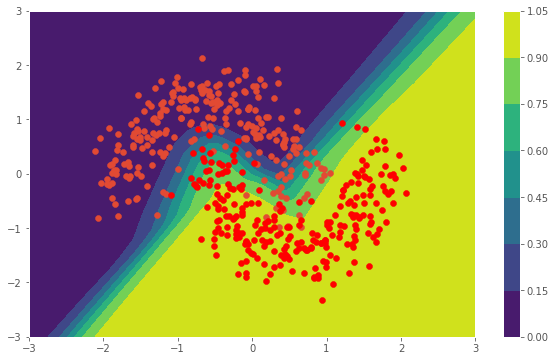

In [24]:
print(model.evaluate(X_test, Y_test))
probs = model.predict_proba(grid_2d, batch_size=64)
fig, ax = plt.subplots(figsize=(10, 6))
contour = ax.contourf(X, Y, probs[:,0].reshape(100, 100))
ax.scatter(X_test[Y_test==0, 0], X_test[Y_test==0, 1])
ax.scatter(X_test[Y_test==1, 0], X_test[Y_test==1, 1], color='r')
cbar = plt.colorbar(contour, ax=ax)

Un pic de insides din keras. Cum salvezi si incarci un model: easy

In [79]:
import os

In [80]:
model_path = 'keras_tests'
model_name = "keras_2moons_classifier.h5"

In [81]:
model.save(os.path.join(model_path, model_name))

In [82]:
from keras.models import load_model
new_model = load_model(os.path.join(model_path, model_name))

In [83]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_16 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_17 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 17        
Total params: 1,137
Trainable params: 1,137
Non-trainable params: 0
_________________________________________________________________


Cum poti sa vezi efectiv weight-urile dintr-un anumit layer: cu get_weights (aci ti le-am si plotat ca imagine, ca e mai usor de vazut cu ochiu decat sa te uiti la numerele din numpy array, dar e doar o matrice 2x16 (2 inputuri, 16 neuroni, ca am scos weighturile din primul layer; poti sa te joci cu altele).

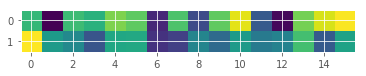

In [84]:
plt.imshow(new_model.layers[0].get_weights()[0])